In [11]:
# !pip install matplotlib

!pip install plotly tkhtmlview


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 12.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.4/332.4 kB 16.6 MB/s eta 0:00:00


In [12]:
!pip install pywebview


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.5/475.5 kB 2.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 2.0 MB/s eta 0:00:00:00:01
  Created wheel for proxy_tools: filename=proxy_tools-0.1.0-py3-none-any.whl size=2935 sha256=46c4c1e7a460e7a700e935a251164c09589f6c10d7a2d29f1e823413be44a2aa
  Stored in directory: /home/guilherme/.cache/pip/wheels/07/37/12/f3390260c831aa68c3835d6ec2e10d8da094b5fc0ac32feb14
Successfully built proxy_tools


In [81]:
import pandas as pd

df = pd.read_csv("/media/guilherme/ssd_m2_data/py_new_projects/fast_english/database/infos/game_data_hangman.csv")

In [82]:
df

,datetime,word,hint,won,difficulty,total_attempts,used_attempts,correct_guessed_letters,incorrect_guessed_letters,correct_guesses,incorrect_guesses,time_taken,game_name,clicks_on_guess,category,sub_category,id_game
0,2025-05-01T08:48:23,cramped,NaN,False,1.00,6,6,c,"o,l,q,s,f,w",NaN,NaN,NaN,hangman,NaN,NaN,NaN,NaN
1,2025-05-01T08:48:44,clean,NaN,True,0.00,6,0,"c,l,e,a,n",NaN,NaN,NaN,NaN,hangman,NaN,NaN,NaN,NaN
2,2025-05-01T09:00:43,noisy,NaN,True,0.00,6,0,"n,o,i,s,y",NaN,NaN,NaN,12.170000,hangman,NaN,NaN,NaN,NaN
3,2025-05-01T09:01:24,dusty,NaN,True,0.67,6,4,"d,u,s,t,y","r,i,e,p",NaN,NaN,39.730000,hangman,NaN,NaN,NaN,NaN
4,2025-05-01T09:02:01,contemporary,NaN,True,0.00,6,0,"c,o,n,t,e,m,p,o,r,a,r,y",NaN,NaN,NaN,34.690000,hangman,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-05-04T17:44:03,furniture,a mobília,False,1.00,6,6,i,"c,o,l,b,a,m",NaN,NaN,36.013005,hangman,7.0,casa,mobiliario,NaN
344,2025-05-04T17:44:49,footstool,o escabelo,False,1.00,6,6,"f,t,t,l","c,g,z,r,a,e",NaN,NaN,39.013716,hangman,10.0,casa,mobiliario,NaN
345,2025-05-04T17:45:24,armchair,a poltrona,True,0.00,6,0,"a,r,m,c,h,a,i,r",NaN,NaN,NaN,32.014739,hangman,4.0,casa,mobiliario,NaN
346,2025-05-04T19:43:10,hot tub,a banheira de hidromassagem,True,0.33,6,2,"h,o,t,t,u,b","p,e",NaN,NaN,48.020268,hangman,6.0,casa,mobiliario,47c8ed06adee90da


In [5]:
len(df["word"].unique())

86

In [50]:
# df.dropna(subset="category", inplace=True)
# df["category"] = df["category"].astype(int)

df_category_word_mean = df.groupby("category").agg(
    category_word_mean=("word", "count")
).reset_index()

df_category_word_mean

,category,category_word_mean
0,adjetivos,78
1,casa,110


In [69]:
from datetime import datetime
df["datetime"] = pd.to_datetime(df["datetime"], format='%Y-%m-%d')

df["datetime_per_day"] = df["datetime"].apply(lambda x: f"{x.year}-{x.month}-{x.day}")

In [75]:
df_word_count_per_day = df.groupby("datetime_per_day").agg(
    word_count = ("word", "count")
).reset_index()

df_word_count_per_day

,datetime_per_day,word_count
0,2025-5-1,157
1,2025-5-3,78


<Axes: xlabel='datetime_per_day'>

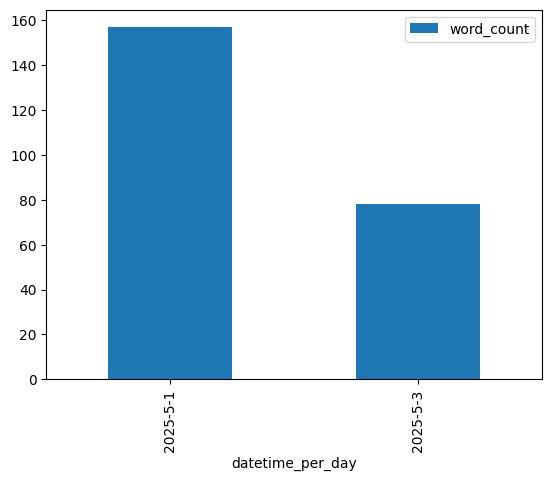

In [77]:
df_word_count_per_day.plot(kind="bar", x="datetime_per_day", y="word_count")

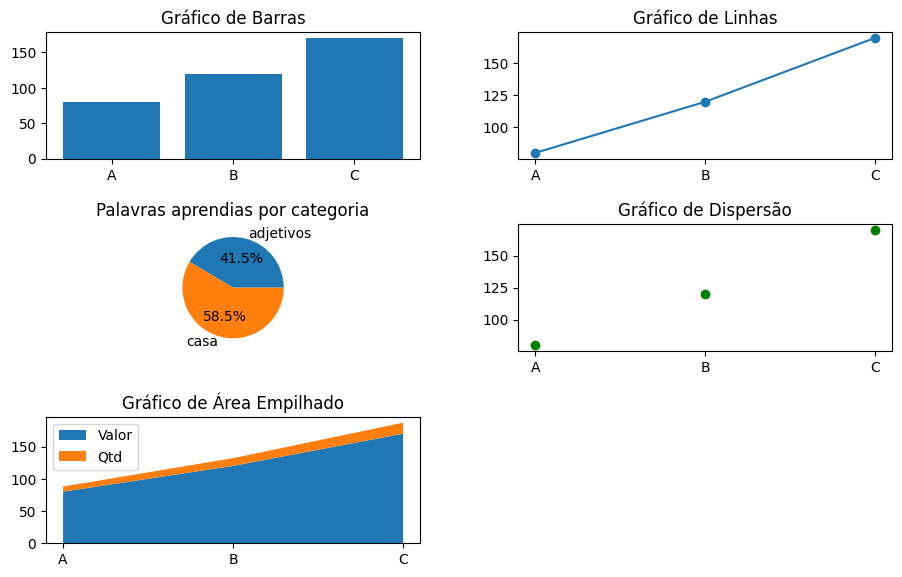

In [51]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Dados de exemplo
dados = pd.DataFrame({
    'Categoria': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Valor': [100, 150, 200, 80, 120, 170],
    'Qtd': [10, 15, 20, 8, 12, 17],
    'Ano': [2023, 2023, 2023, 2024, 2024, 2024]
})

# Função para atualizar todos os gráficos
def atualizar_graficos():
    ano = int(combo_ano.get())
    df = dados[dados['Ano'] == ano]
    categorias = df['Categoria']
    valores = df['Valor']
    qtds = df['Qtd']

    for ax in fig.axes:
        ax.clear()

    # Gráfico de Barras
    fig.axes[0].bar(categorias, valores)
    fig.axes[0].set_title("Gráfico de Barras")

    # Gráfico de Linhas
    fig.axes[1].plot(categorias, valores, marker='o')
    fig.axes[1].set_title("Gráfico de Linhas")

    # Gráfico de Pizza
    # df_category_word_mean.plot(kind="pie", x="category", y="category_word_mean")
    fig.axes[2].pie(x=df_category_word_mean["category_word_mean"], labels=df_category_word_mean["category"], autopct='%1.1f%%')
    # fig.axes[2].legend()
    fig.axes[2].set_title("Palavras aprendias por categoria")
    

    # Gráfico de Dispersão
    fig.axes[3].scatter(categorias, valores, color='green')
    fig.axes[3].set_title("Gráfico de Dispersão")

    # Gráfico de Área (empilhado com Qtd)
    fig.axes[4].stackplot(categorias, valores, qtds, labels=['Valor', 'Qtd'])
    fig.axes[4].legend()
    fig.axes[4].set_title("Gráfico de Área Empilhado")

        # Atualizar KPI (crescimento percentual em relação a 2023)
    if ano != 2023:
        total_atual = dados[dados['Ano'] == ano]['Valor'].sum()
        total_2023 = dados[dados['Ano'] == 2023]['Valor'].sum()
        if total_2023 > 0:
            crescimento = ((total_atual - total_2023) / total_2023) * 100
            cor = "green" if crescimento >= 0 else "red"
            label_kpi.config(text=f"Crescimento: {crescimento:.1f}%", foreground=cor)

    canvas.draw()

# Janela principal
root = tk.Tk()
root.title("Painel Multi-Gráficos - Estilo Power BI")
root.geometry("1000x700")

# Filtro de ano
frame_top = ttk.Frame(root)
frame_top.pack(fill='x', padx=10, pady=5)

# Painel KPI (percentual)
frame_kpi = ttk.Frame(root)
frame_kpi.pack(fill='x', padx=10, pady=5)

label_kpi = ttk.Label(frame_kpi, text="Crescimento: --%", font=("Arial", 18), foreground='green')
label_kpi.pack()


ttk.Label(frame_top, text="Ano:").pack(side='left')
combo_ano = ttk.Combobox(frame_top, values=sorted(dados['Ano'].unique()), state='readonly')
combo_ano.set(dados['Ano'].max())
combo_ano.pack(side='left', padx=5)

ttk.Button(frame_top, text="Atualizar", command=atualizar_graficos).pack(side='left', padx=5)

# Área dos gráficos
frame_chart = ttk.Frame(root)
frame_chart.pack(fill='both', expand=True)

fig, axs = plt.subplots(3, 2, figsize=(10, 8))
fig.tight_layout(pad=4)
fig.delaxes(axs[2][1])  # Remove o sexto espaço não utilizado

canvas = FigureCanvasTkAgg(fig, master=frame_chart)
canvas.get_tk_widget().pack(fill='both', expand=True)

# Primeira renderização
atualizar_graficos()

root.mainloop()


In [15]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Dados simulados
dados = pd.DataFrame({
    'Categoria': ['A', 'B', 'C'],
    'Valor_2023': [100, 150, 200],
    'Valor_2024': [110, 180, 220],
})

# Função para calcular e atualizar o KPI
def atualizar_kpi():
    total_2023 = dados['Valor_2023'].sum()
    total_2024 = dados['Valor_2024'].sum()
    crescimento = ((total_2024 - total_2023) / total_2023) * 100
    label_kpi.config(text=f"Crescimento: {crescimento:.1f}%")

# Função para atualizar o gráfico
def atualizar_graficos():
    fig.clear()
    ax = fig.add_subplot(111)

    categorias = dados['Categoria']
    valores_2023 = dados['Valor_2023']
    valores_2024 = dados['Valor_2024']

    ax.bar(categorias, valores_2023, label='2023')
    ax.bar(categorias, valores_2024, label='2024', alpha=0.7)
    ax.set_title("Comparativo de Valores")
    ax.legend()

    canvas.draw()
    atualizar_kpi()

# Janela principal
root = tk.Tk()
root.title("Dashboard Estilo Power BI com KPI")
root.geometry("800x600")

# Frame superior com KPI
frame_top = ttk.Frame(root)
frame_top.pack(fill='x', padx=10, pady=10)

label_kpi = ttk.Label(frame_top, text="Crescimento: --%", font=("Arial", 20), foreground='green')
label_kpi.pack()

# Frame para o gráfico
frame_chart = ttk.Frame(root)
frame_chart.pack(fill='both', expand=True)

fig = plt.Figure(figsize=(6, 4), dpi=100)
canvas = FigureCanvasTkAgg(fig, master=frame_chart)
canvas.get_tk_widget().pack(fill='both', expand=True)

# Botão de atualização
ttk.Button(root, text="Atualizar", command=atualizar_graficos).pack(pady=5)

# Primeira renderização
atualizar_graficos()

root.mainloop()
